# Importing Dependencies

In [76]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import warnings
warnings.filterwarnings('ignore')

# Sneak Peak

In [77]:
df = pd.read_csv(r'C:\Users\02adv\Desktop\inventory management\customer_churn_dataset-training-master.csv')

In [78]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [79]:
df.shape

(440833, 12)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [81]:
df.describe().round(2)

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00
mean,225398.67,39.37,31.26,15.81,3.60,12.97,631.62,14.48,0.57
std,129531.92,12.44,17.26,8.59,3.07,8.26,240.80,8.60,0.50
min,2.00,18.00,1.00,1.00,0.00,0.00,100.00,1.00,0.00
25%,113621.75,29.00,16.00,9.00,1.00,6.00,480.00,7.00,0.00
50%,226125.50,39.00,32.00,16.00,3.00,12.00,661.00,14.00,1.00
75%,337739.25,48.00,46.00,23.00,6.00,19.00,830.00,22.00,1.00
max,449999.00,65.00,60.00,30.00,10.00,30.00,1000.00,30.00,1.00


In [82]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [83]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# Duplicates

In [84]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df['CustomerID'].value_counts()[df['CustomerID'].value_counts() > 1]


Series([], Name: count, dtype: int64)

# Null Values

In [87]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [88]:
df.isnull().mean()*100

CustomerID           0.000227
Age                  0.000227
Gender               0.000227
Tenure               0.000227
Usage Frequency      0.000227
Support Calls        0.000227
Payment Delay        0.000227
Subscription Type    0.000227
Contract Length      0.000227
Total Spend          0.000227
Last Interaction     0.000227
Churn                0.000227
dtype: float64

In [89]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [90]:
df.dropna(subset=['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],inplace=True)

In [91]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [92]:
df.shape

(440832, 12)

# Checking Catogorical Columns

In [93]:
df.columns = ['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage_Frequency',
       'Support_Calls', 'Payment_Delay', 'Subscription_Type',
       'Contract_Length', 'Total_Spend', 'Last_Interaction', 'Churn']

In [94]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [95]:
np.unique(df['Gender'],return_counts=True)

(array(['Female', 'Male'], dtype=object), array([190580, 250252]))

In [96]:
np.unique(df['Subscription_Type'],return_counts=True)

(array(['Basic', 'Premium', 'Standard'], dtype=object),
 array([143026, 148678, 149128]))

In [97]:
np.unique(df['Contract_Length'],return_counts=True)

(array(['Annual', 'Monthly', 'Quarterly'], dtype=object),
 array([177198,  87104, 176530]))

# Checking Outliers

In [98]:
def drop_outliers_iqr( column,df=df):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [99]:
df.describe().round(2)

,CustomerID,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Churn
count,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00
mean,225398.67,39.37,31.26,15.81,3.60,12.97,631.62,14.48,0.57
std,129531.92,12.44,17.26,8.59,3.07,8.26,240.80,8.60,0.50
min,2.00,18.00,1.00,1.00,0.00,0.00,100.00,1.00,0.00
25%,113621.75,29.00,16.00,9.00,1.00,6.00,480.00,7.00,0.00
50%,226125.50,39.00,32.00,16.00,3.00,12.00,661.00,14.00,1.00
75%,337739.25,48.00,46.00,23.00,6.00,19.00,830.00,22.00,1.00
max,449999.00,65.00,60.00,30.00,10.00,30.00,1000.00,30.00,1.00


In [100]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage_Frequency      float64
Support_Calls        float64
Payment_Delay        float64
Subscription_Type     object
Contract_Length       object
Total_Spend          float64
Last_Interaction     float64
Churn                float64
dtype: object

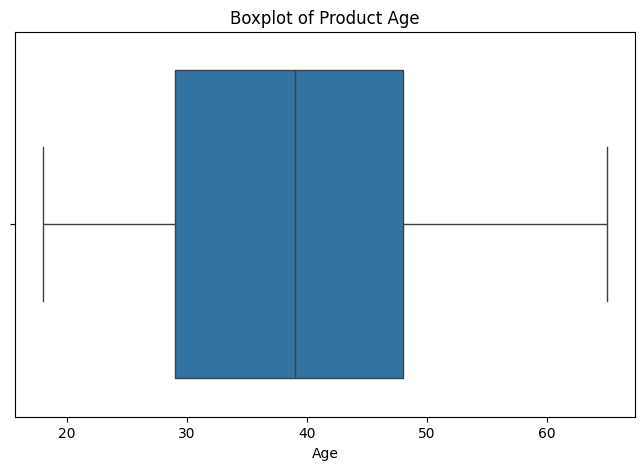

In [101]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Product Age')
plt.xlabel('Age')
plt.show()

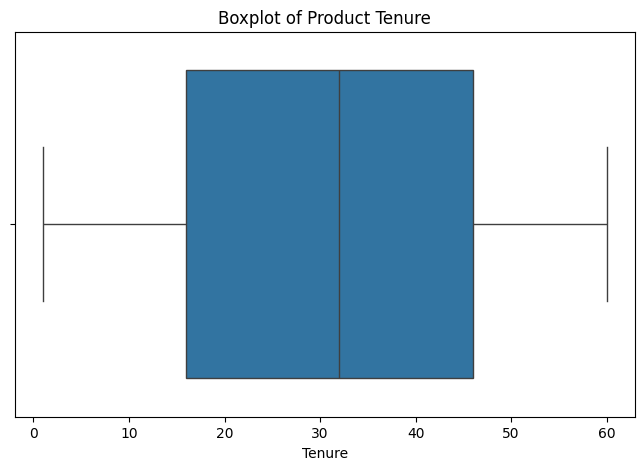

In [102]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Tenure'])
plt.title('Boxplot of Product Tenure')
plt.xlabel('Tenure')
plt.show()

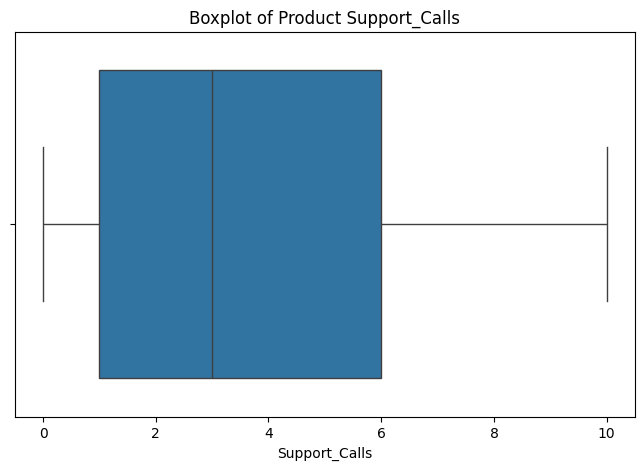

In [103]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Support_Calls'])
plt.title('Boxplot of Product Support_Calls')
plt.xlabel('Support_Calls')
plt.show()

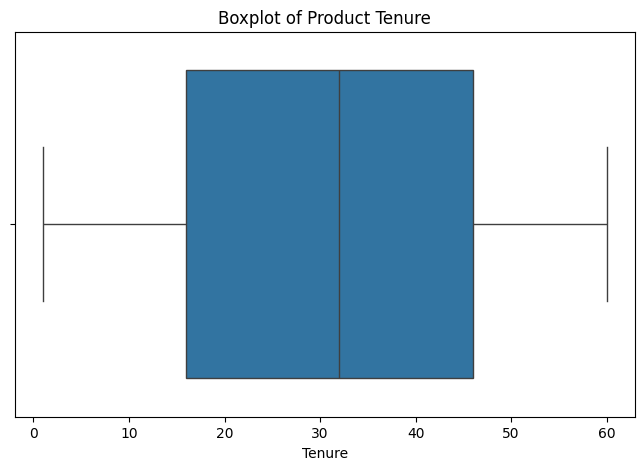

In [104]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Tenure'])
plt.title('Boxplot of Product Tenure')
plt.xlabel('Tenure')
plt.show()

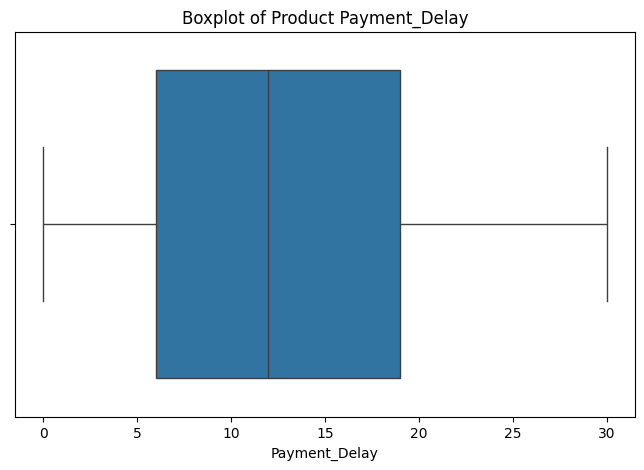

In [105]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Payment_Delay'])
plt.title('Boxplot of Product Payment_Delay')
plt.xlabel('Payment_Delay')
plt.show()

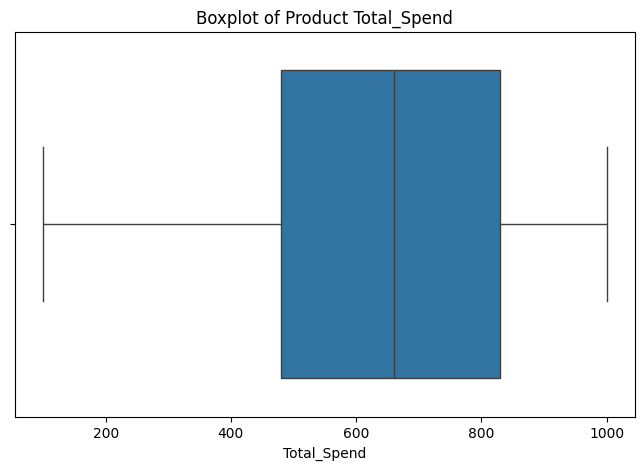

In [106]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Total_Spend'])
plt.title('Boxplot of Product Total_Spend')
plt.xlabel('Total_Spend')
plt.show()

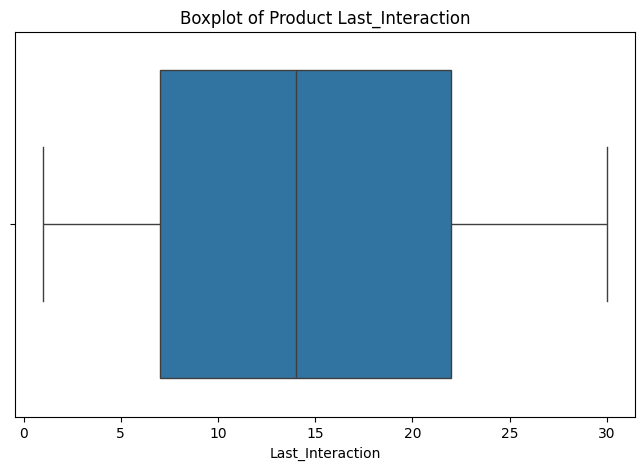

In [107]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Last_Interaction'])
plt.title('Boxplot of Product Last_Interaction')
plt.xlabel('Last_Interaction')
plt.show()

In [108]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# Multicolinearity using VIF

In [109]:
df.drop('CustomerID',axis=True,inplace=True)

In [110]:
df.head()

,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [111]:
df.dtypes

Age                  float64
Gender                object
Tenure               float64
Usage_Frequency      float64
Support_Calls        float64
Payment_Delay        float64
Subscription_Type     object
Contract_Length       object
Total_Spend          float64
Last_Interaction     float64
Churn                float64
dtype: object

In [112]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage_Frequency', 'Support_Calls',
       'Payment_Delay', 'Subscription_Type', 'Contract_Length', 'Total_Spend',
       'Last_Interaction', 'Churn'],
      dtype='object')

In [113]:
df.describe().round(2)

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Churn
count,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00
mean,39.37,31.26,15.81,3.60,12.97,631.62,14.48,0.57
std,12.44,17.26,8.59,3.07,8.26,240.80,8.60,0.50
min,18.00,1.00,1.00,0.00,0.00,100.00,1.00,0.00
25%,29.00,16.00,9.00,1.00,6.00,480.00,7.00,0.00
50%,39.00,32.00,16.00,3.00,12.00,661.00,14.00,1.00
75%,48.00,46.00,23.00,6.00,19.00,830.00,22.00,1.00
max,65.00,60.00,30.00,10.00,30.00,1000.00,30.00,1.00


In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# 🔹 Step 1: Define the columns you want to check
selected_columns = ['Age','Tenure', 'Usage_Frequency', 'Support_Calls',
       'Payment_Delay','Total_Spend',
       'Last_Interaction',]  # replace with your actual column names

# 🔹 Step 2: Subset and clean the data
X = df[selected_columns].copy()
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# 🔹 Step 3: Create VIF dataframe
vif_data = pd.DataFrame()
vif_data['Columns'] = X.columns

# 🔹 Step 4: Compute VIF
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 🔹 Step 5: Display results
print(vif_data)


            Columns       VIF
0               Age  8.043743
1            Tenure  3.823644
2   Usage_Frequency  3.917277
3     Support_Calls  2.522120
4     Payment_Delay  3.333153
5       Total_Spend  5.728235
6  Last_Interaction  3.557626


<Axes: >

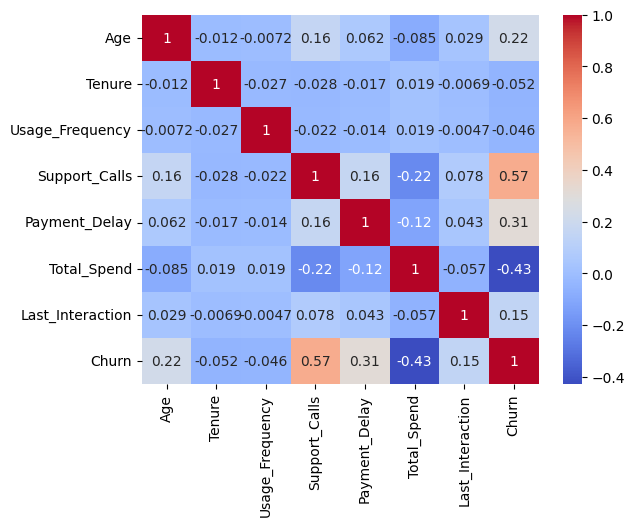

In [115]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Univariate Analysis

In [116]:
catogorical_col = ['Gender',
       'Subscription_Type', 'Contract_Length']

continous_col = ['Age',  'Tenure', 'Usage_Frequency', 'Support_Calls',
       'Payment_Delay', 'Total_Spend',
       'Last_Interaction']

target_col = ['Churn']

In [117]:
df['Age'] = df['Age'].astype(int)
df['Tenure'] = df['Tenure'].astype(int)

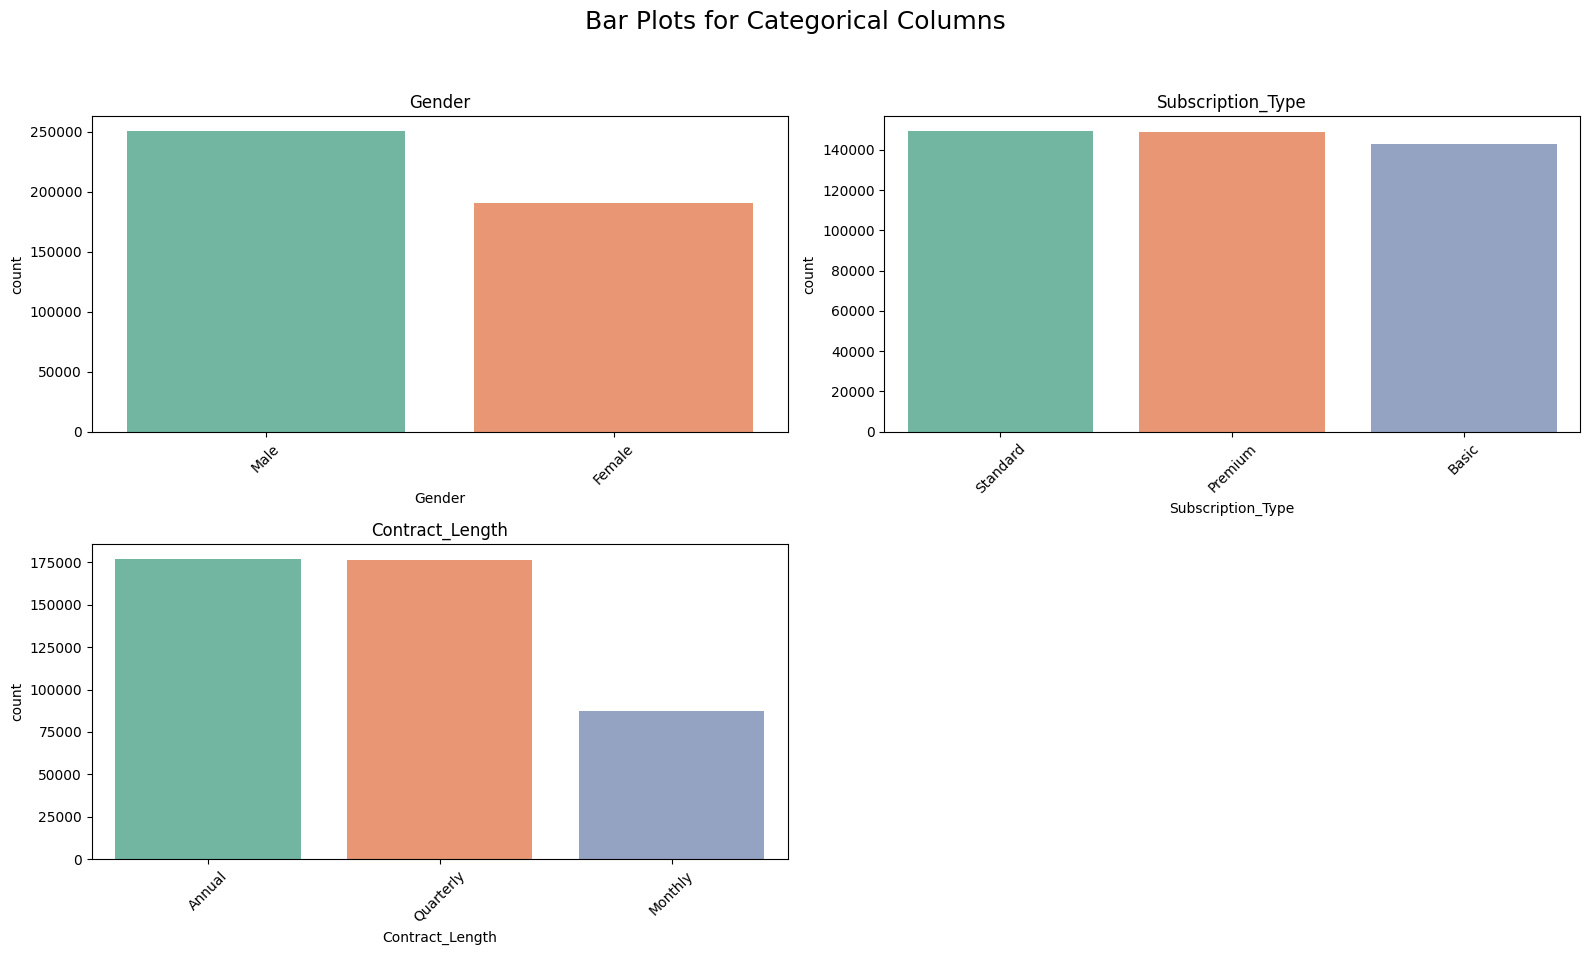

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of categorical columns to plot
n = len(catogorical_col)
cols = 2
rows = math.ceil(n / cols)

plt.figure(figsize=(16, 5 * rows))
plt.suptitle('Bar Plots for Categorical Columns', fontsize=18)

for i, col in enumerate(catogorical_col):
    plt.subplot(rows, cols, i + 1)
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # leave space for suptitle
plt.show()


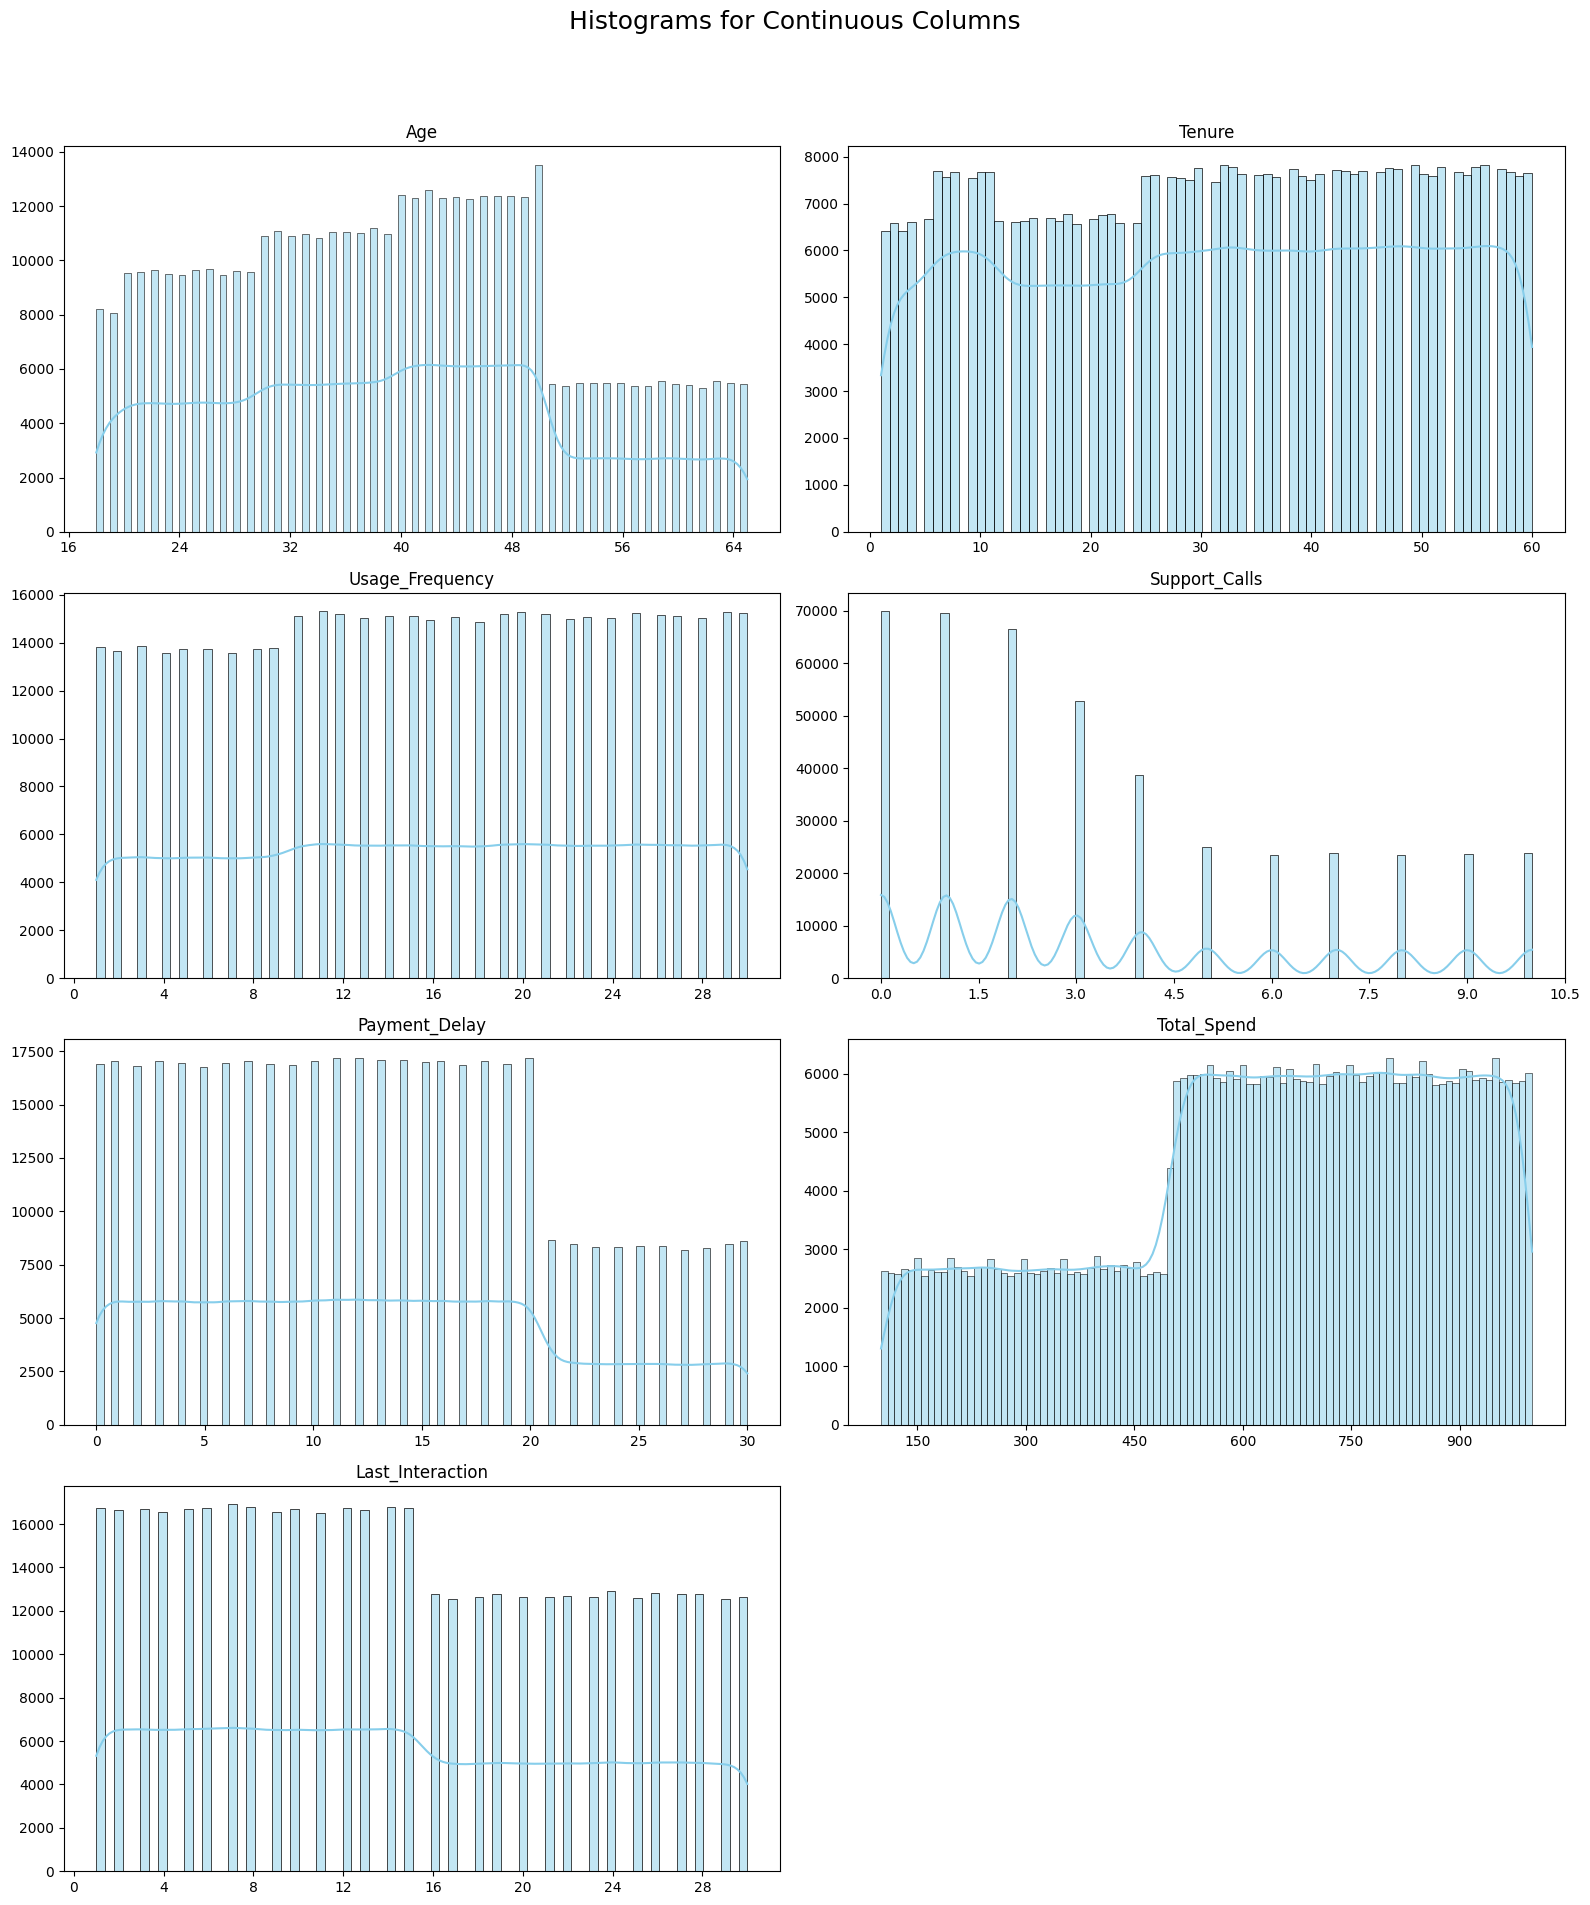

In [119]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Dynamic layout
n = len(continous_col)
cols = 2
rows = math.ceil(n / cols)

plt.figure(figsize=(16, 5 * rows))
plt.suptitle('Histograms for Continuous Columns', fontsize=18)

for i, col in enumerate(continous_col):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(col)

    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(nbins=8))  # Max 8 ticks

    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # leave space for suptitle
plt.show()


# Bivariate Analysis

In [120]:
df.describe().round(2)

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Churn
count,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00,440832.00
mean,39.37,31.26,15.81,3.60,12.97,631.62,14.48,0.57
std,12.44,17.26,8.59,3.07,8.26,240.80,8.60,0.50
min,18.00,1.00,1.00,0.00,0.00,100.00,1.00,0.00
25%,29.00,16.00,9.00,1.00,6.00,480.00,7.00,0.00
50%,39.00,32.00,16.00,3.00,12.00,661.00,14.00,1.00
75%,48.00,46.00,23.00,6.00,19.00,830.00,22.00,1.00
max,65.00,60.00,30.00,10.00,30.00,1000.00,30.00,1.00


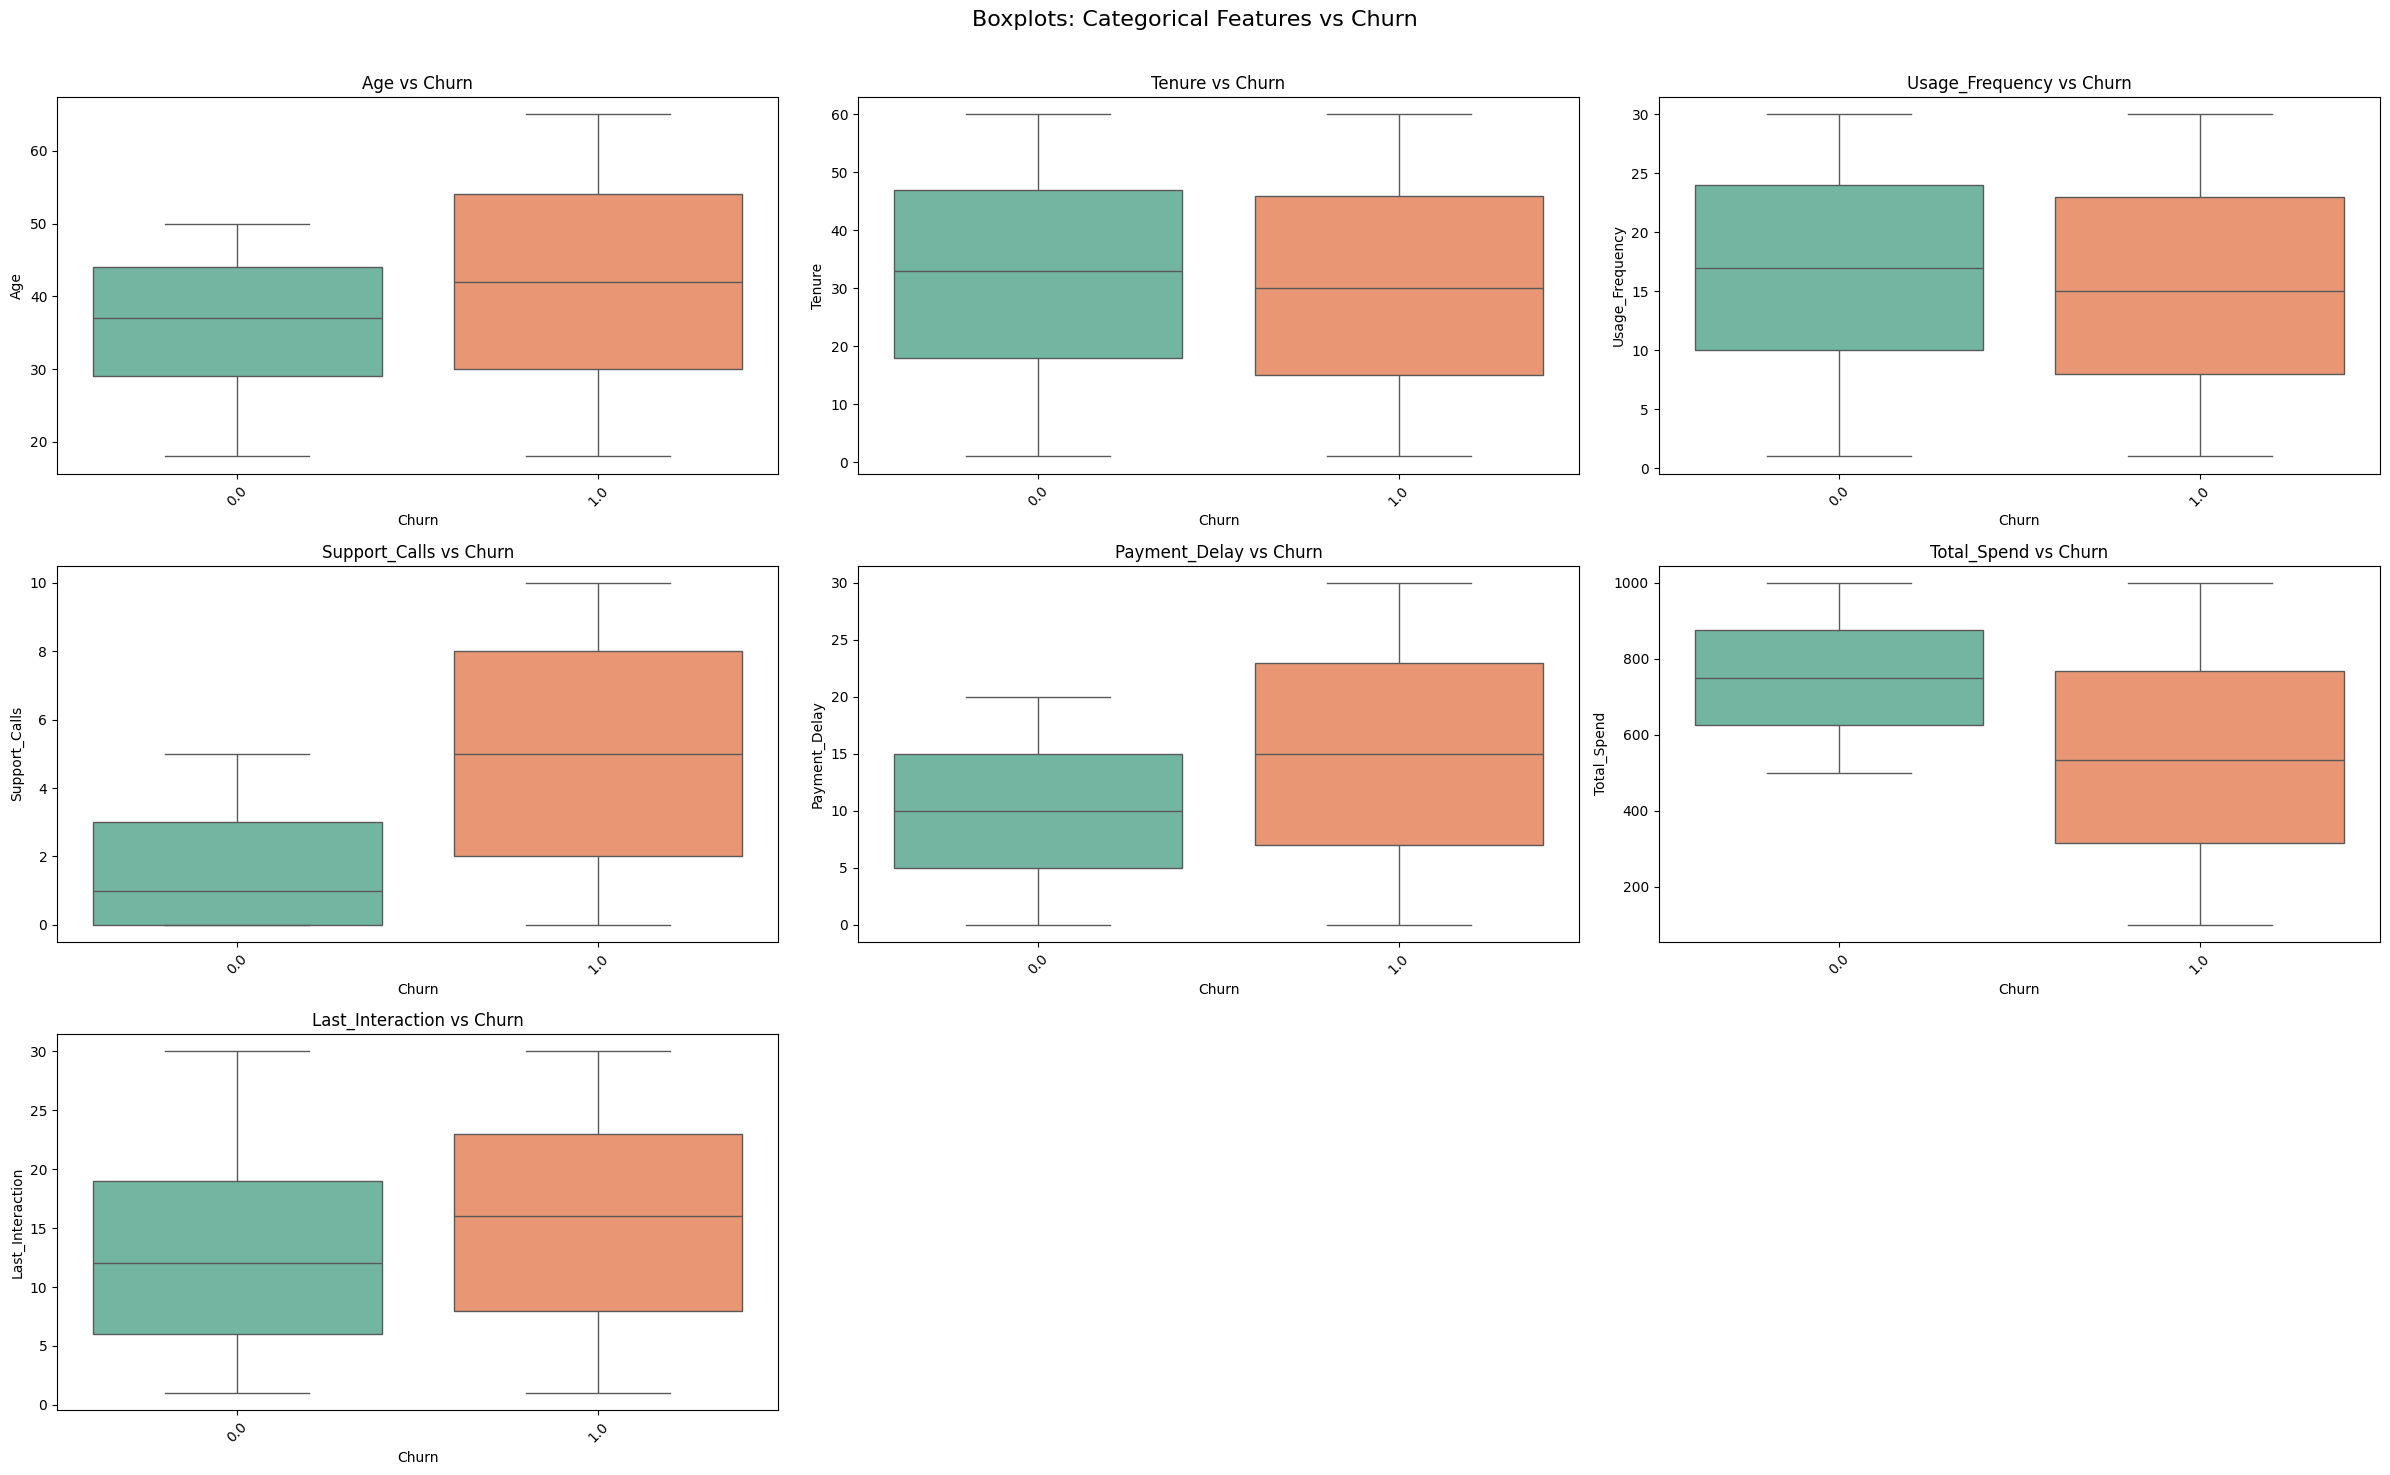

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Choose one continuous variable to compare against
target_col = 'Churn'  # <-- change to any from continous_col list

# Plot setup
n_cols = 3
n_plots = len(continous_col)
n_rows = math.ceil(n_plots / n_cols)

plt.figure(figsize=(8 * n_cols, 5 * n_rows))
plt.suptitle(f'Boxplots: Categorical Features vs {target_col}', fontsize=16)

for i, col in enumerate(continous_col):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df, x=target_col, y=col, palette='Set2')
    plt.title(f'{col} vs {target_col}')
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



# Multi Series Analysis

In [122]:
df.head()

,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
0,30,Female,39,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65,Female,49,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55,Female,14,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58,Male,38,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23,Male,32,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


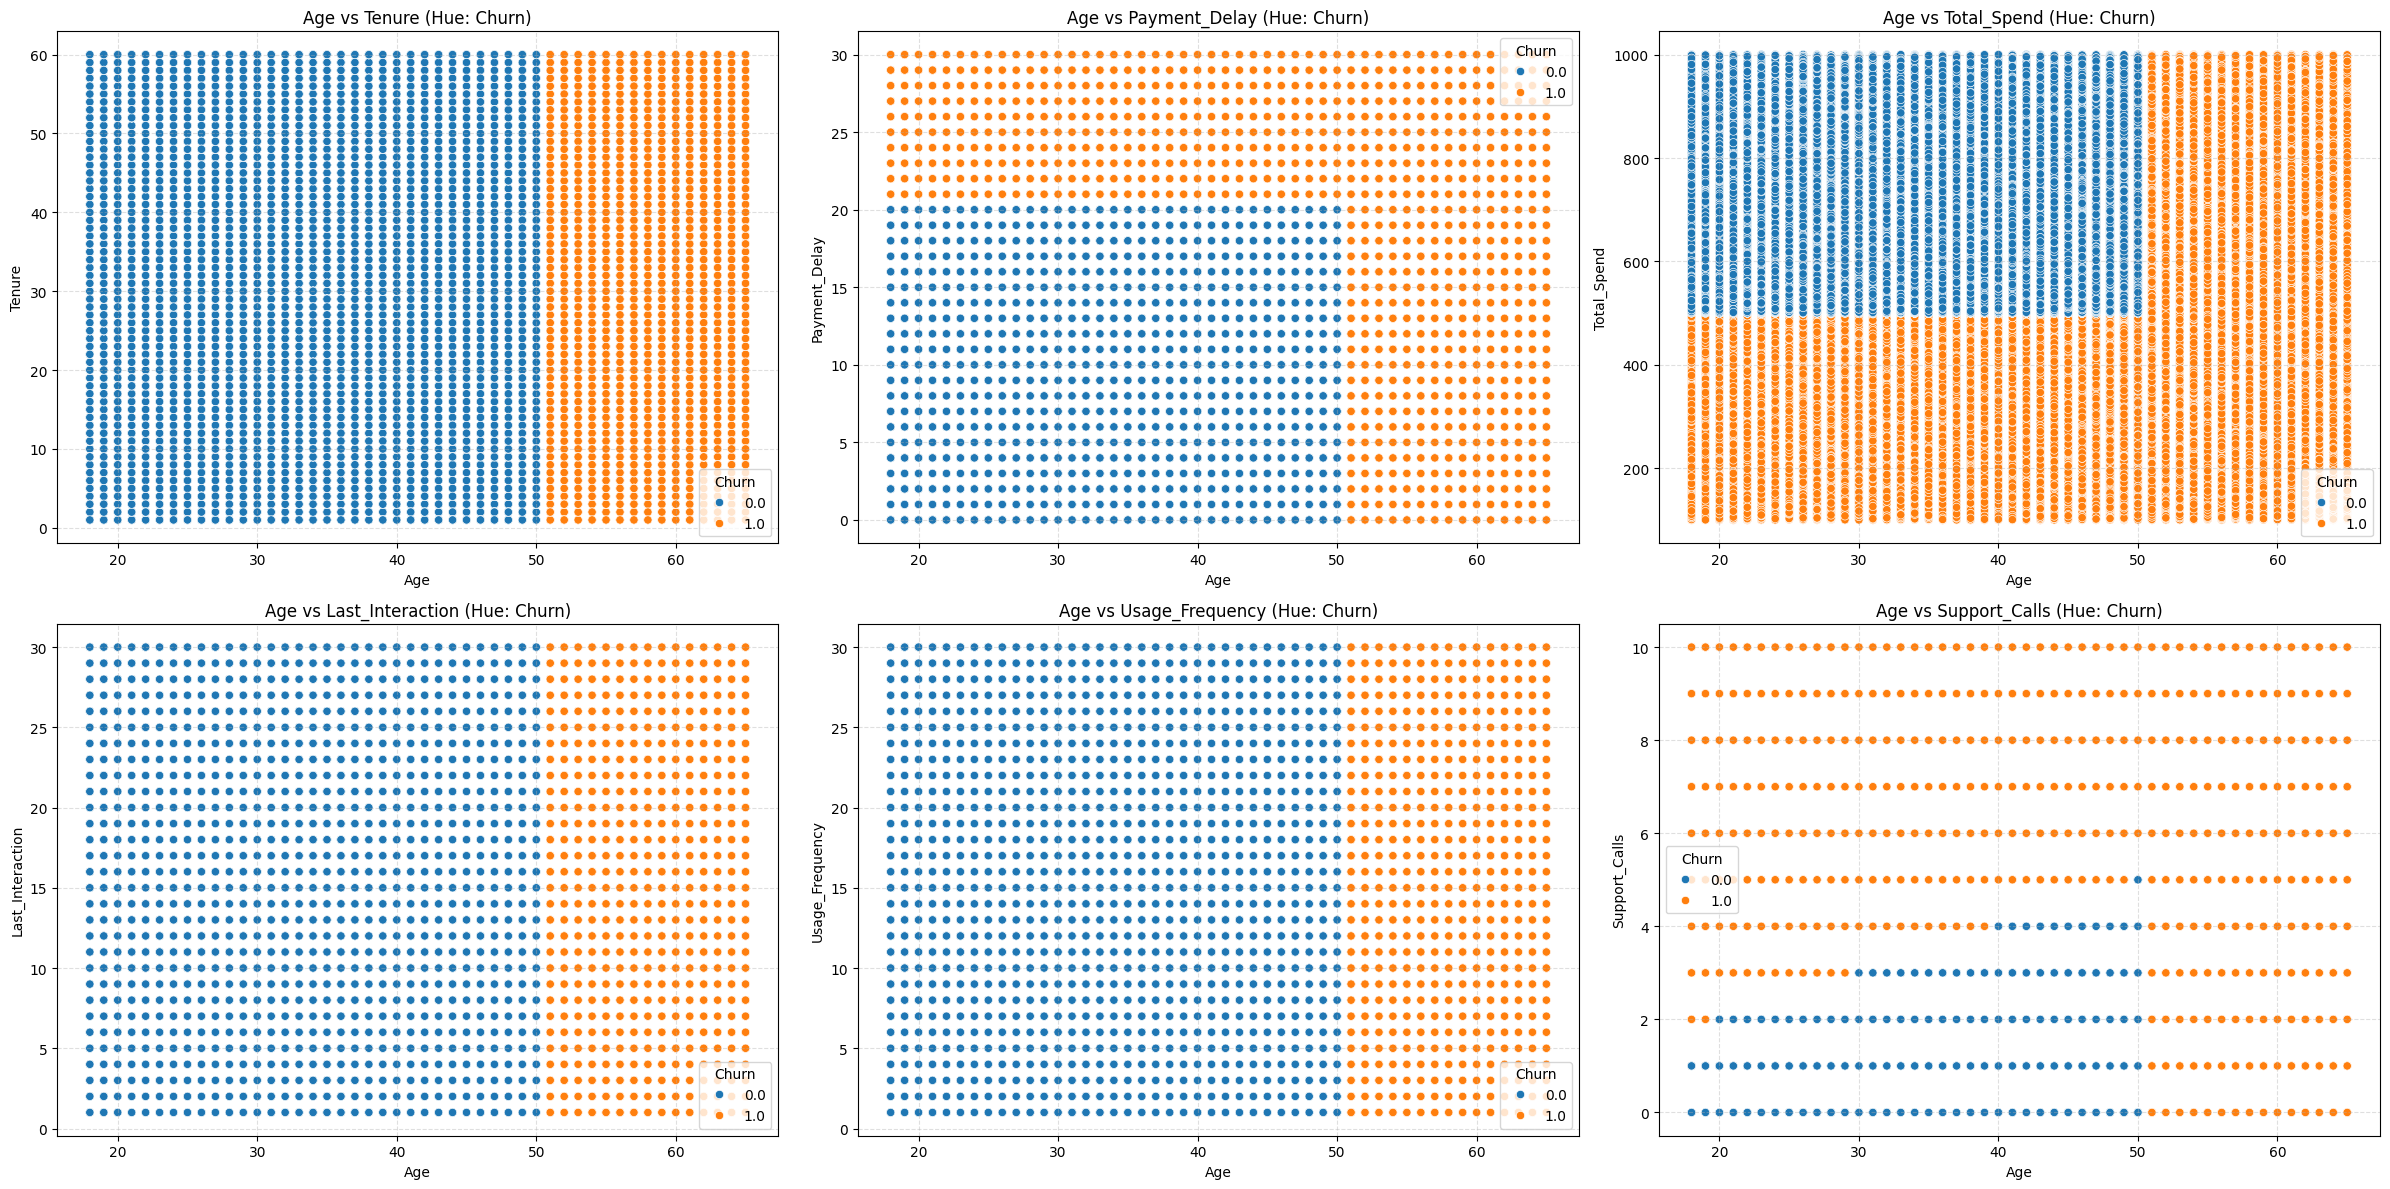

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up 1×3 subplot grid for 3 plots
fig, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot 2: Hue = Churn
sns.scatterplot(data=df, x='Age', y='Tenure', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Age vs Tenure (Hue: Churn)')

# Plot 3: Hue = Churn
sns.scatterplot(data=df, x='Age', y='Payment_Delay', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Age vs Payment_Delay (Hue: Churn)')

# Plot 4: Hue = Churn
sns.scatterplot(data=df, x='Age', y='Total_Spend', hue='Churn', ax=axes[0,2])
axes[0,2].set_title('Age vs Total_Spend (Hue: Churn)')

sns.scatterplot(data=df, x='Age', y='Last_Interaction', hue='Churn', ax=axes[1,0])
axes[1,0].set_title('Age vs Last_Interaction (Hue: Churn)')

# Plot 6: Hue = Churn
sns.scatterplot(data=df, x='Age', y='Usage_Frequency', hue='Churn', ax=axes[1,1])
axes[1,1].set_title('Age vs Usage_Frequency (Hue: Churn)')

# Plot 7: Hue = Churn
sns.scatterplot(data=df, x='Age', y='Support_Calls', hue='Churn', ax=axes[1,2])
axes[1,2].set_title('Age vs Support_Calls (Hue: Churn)')

# Optional: Grid and layout
for ax in axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


# Heatmap

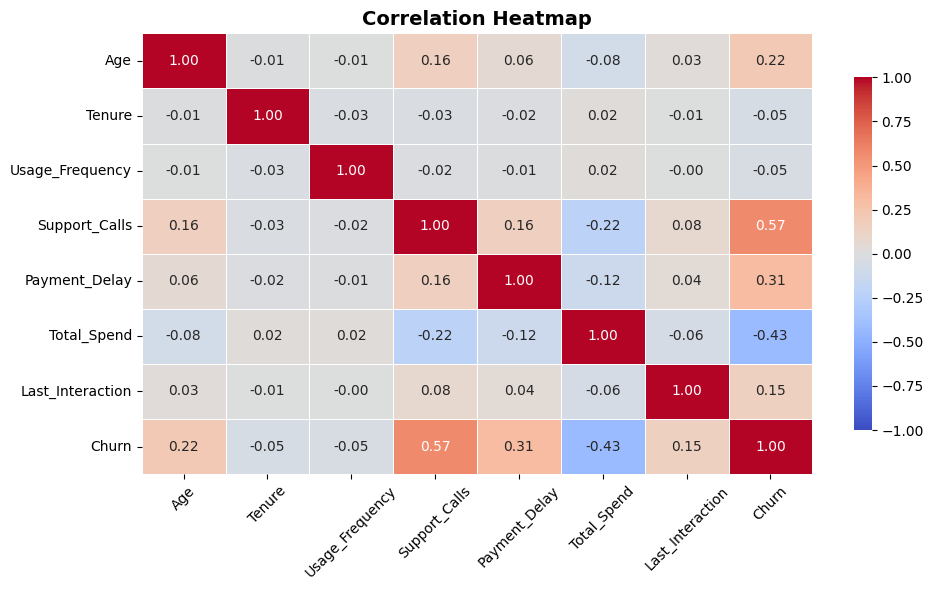

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(10, 6))

# Plot heatmap
sns.heatmap(
    corr_matrix,
    annot=True,            # show correlation coefficients
    fmt=".2f",             # format to 2 decimal places
    cmap="coolwarm",       # color scheme
    vmin=-1, vmax=1,       # value range
    linewidths=0.5,        # lines between cells
    cbar_kws={"shrink": 0.8}  # color bar settings
)

plt.title("Correlation Heatmap", fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Corelation of churn with all features

In [125]:
# Compute correlation matrix (numeric only)
correlations = df.corr(numeric_only=True)

# Extract correlation of all features with target column (e.g., 'Churn')
target_corr = correlations['Churn'].drop('Churn')  # Drop self-correlation

# Sort by correlation (optional)
target_corr_sorted = target_corr.sort_values(ascending=False)

# Display result
print(target_corr_sorted)

Support_Calls       0.574267
Payment_Delay       0.312129
Age                 0.218394
Last_Interaction    0.149616
Usage_Frequency    -0.046101
Tenure             -0.051919
Total_Spend        -0.429355
Name: Churn, dtype: float64


# Model Trainig

In [126]:
# Create empty list to collect all model results
model_results = []

def store_classification_metrics(name, train_acc, test_acc, precision, recall, f1, auc):
    model_results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': auc
    })


## Dummy Variables

In [127]:
df.head()

,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
0,30,Female,39,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65,Female,49,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55,Female,14,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58,Male,38,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23,Male,32,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [128]:
Gender_dummy = pd.get_dummies(df['Gender'], prefix='Gender',drop_first=True).astype(int)
df= df.drop('Gender', axis=1)
df = pd.concat([df,Gender_dummy], axis=1)

Subscription_dummy = pd.get_dummies(df['Subscription_Type'], prefix='Subscription_Type',drop_first=True).astype(int)
df= df.drop('Subscription_Type', axis=1)
df = pd.concat([df,Subscription_dummy], axis=1)

Contract_Length_dummy = pd.get_dummies(df['Contract_Length'], prefix='Contract_Length',drop_first=True).astype(int)
df= df.drop('Contract_Length', axis=1)
df = pd.concat([df,Contract_Length_dummy], axis=1)

In [129]:
df.head()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Churn,Gender_Male,Subscription_Type_Premium,Subscription_Type_Standard,Contract_Length_Monthly,Contract_Length_Quarterly
0,30,39,14.0,5.0,18.0,932.0,17.0,1.0,0,0,1,0,0
1,65,49,1.0,10.0,8.0,557.0,6.0,1.0,0,0,0,1,0
2,55,14,4.0,6.0,18.0,185.0,3.0,1.0,0,0,0,0,1
3,58,38,21.0,7.0,7.0,396.0,29.0,1.0,1,0,1,1,0
4,23,32,20.0,5.0,8.0,617.0,20.0,1.0,1,0,0,1,0


# Splitting data in training and testing

In [130]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [134]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], test_size=0.2, random_state=20)

## Multi Catigorical Regression

In [135]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Add constant
x_train_logit = sm.add_constant(x_train, prepend=False)
x_test_logit = sm.add_constant(x_test, prepend=False)

# Fit logistic regression
logit_model = sm.Logit(y_train, x_train_logit).fit()
print(logit_model.summary())

# Predict probabilities & class
y_train_pred_prob = logit_model.predict(x_train_logit)
y_test_pred_prob = logit_model.predict(x_test_logit)

y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)

# Evaluation metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall    = recall_score(y_test, y_test_pred)
f1        = f1_score(y_test, y_test_pred)
auc       = roc_auc_score(y_test, y_test_pred_prob)

# Print evaluation
print(f"\nModel Evaluation:")
print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test Accuracy  : {test_acc:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall         : {recall:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"ROC AUC Score  : {auc:.4f}")

# Remove old "Logistic Regression" entry if it exists
model_results = [result for result in model_results if result['Model'] != "Logistic Regression"]


# Store in results
store_classification_metrics("Logistic Regression", train_acc, test_acc, precision, recall, f1, auc)


         Current function value: 0.243416
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:               352665
Model:                          Logit   Df Residuals:                   352652
Method:                           MLE   Df Model:                           12
Date:                Sun, 29 Jun 2025   Pseudo R-squ.:                  0.6442
Time:                        10:33:29   Log-Likelihood:                -85844.
converged:                      False   LL-Null:                   -2.4127e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                            0.0359      0.001     64.726      0.000       0.035       0.037
Tenure           

## Decision Tree

In [ ]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm
import numpy as np

# Define parameter grid
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [2],
    'min_samples_split': [4],
    'min_samples_leaf': [4]
}

# Prepare all combinations of parameters
param_combinations = list(ParameterGrid(param_grid))
print(f"Total combinations: {len(param_combinations)}")

# Initialize tracking variables
best_score = 0
best_model = None
best_params = None

# Progress bar setup
with tqdm(total=len(param_combinations), desc="Tuning Decision Tree", ncols=100) as pbar:
    for params in param_combinations:
        model = DecisionTreeClassifier(random_state=42, **params)
        model.fit(x_train, y_train)
        prob = model.predict_proba(x_test)[:, 1]
        score = roc_auc_score(y_test, prob)

        if score > best_score:
            best_score = score
            best_model = model
            best_params = params

        pbar.update(1)

# Print best parameters
print("\nBest Parameters:", best_params)

# Make predictions
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)
y_test_pred_prob = best_model.predict_proba(x_test)[:, 1]

# Evaluate metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall    = recall_score(y_test, y_test_pred)
f1        = f1_score(y_test, y_test_pred)
auc       = roc_auc_score(y_test, y_test_pred_prob)

# Print evaluation
print(f"\nDecision Tree (Tuned) Evaluation:")
print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test Accuracy  : {test_acc:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall         : {recall:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"ROC AUC Score  : {auc:.4f}")

# Remove old entry if exists
model_results = [result for result in model_results if result['Model'] != "Decision Tree"]

# Store results
store_classification_metrics("Decision Tree", train_acc, test_acc, precision, recall, f1, auc)


Total combinations: 2


Tuning Decision Tree: 100%|███████████████████████████████████████████| 2/2 [00:01<00:00,  1.93it/s]


Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 4}

Decision Tree (Tuned) Evaluation:
Train Accuracy : 0.8721
Test Accuracy  : 0.8718
Precision      : 0.9931
Recall         : 0.7795
F1 Score       : 0.8734
ROC AUC Score  : 0.8886


## Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm

# Define wider parameter grid
param_grid = {
    'n_estimators': [150],
    'max_depth': [14],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'criterion': ['gini','entropy']
}

param_combinations = list(ParameterGrid(param_grid))
print(f"Total combinations: {len(param_combinations)}")

best_score = 0
best_model = None
best_params = None

# Progress bar loop
with tqdm(total=len(param_combinations), desc="Tuning Random Forest", ncols=100) as pbar:
    for params in param_combinations:
        model = RandomForestClassifier(random_state=42, **params)
        model.fit(x_train, y_train)
        prob = model.predict_proba(x_test)[:, 1]
        score = roc_auc_score(y_test, prob)

        if score > best_score:
            best_score = score
            best_model = model
            best_params = params

        pbar.update(1)

# Best model
print("\nBest Parameters:", best_params)

# Predict
y_train_pred = best_model.predict(x_train)
y_test_pred = best_model.predict(x_test)
y_test_pred_prob = best_model.predict_proba(x_test)[:, 1]

# Metrics
train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall    = recall_score(y_test, y_test_pred)
f1        = f1_score(y_test, y_test_pred)
auc       = roc_auc_score(y_test, y_test_pred_prob)

print(f"\nRandom Forest Evaluation:")
print(f"Train Accuracy : {train_acc:.4f}")
print(f"Test Accuracy  : {test_acc:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall         : {recall:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"ROC AUC Score  : {auc:.4f}")

# Remove old entry
model_results = [result for result in model_results if result['Model'] != "Random Forest"]

# Store
store_classification_metrics("Random Forest", train_acc, test_acc, precision, recall, f1, auc)
 

Total combinations: 2


Tuning Random Forest: 100%|███████████████████████████████████████████| 2/2 [01:24<00:00, 42.28s/it]



Best Parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Random Forest Evaluation:
Train Accuracy : 0.9982
Test Accuracy  : 0.9977
Precision      : 1.0000
Recall         : 0.9960
F1 Score       : 0.9980
ROC AUC Score  : 1.0000


## Gradient Decent

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import pandas as pd
import numpy as np

# Define model and param grid
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.15],
    'max_depth': [4],
    'min_samples_split': [3],
    'min_samples_leaf': [3]
}

param_combinations = list(ParameterGrid(param_grid))
best_score = -np.inf
best_params = None

# Manual Grid Search with progress bar
with tqdm(total=len(param_combinations), desc="Tuning GradientBoosting", ncols=100) as pbar:
    for params in param_combinations:
        model = GradientBoostingClassifier(random_state=42, **params)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        score = r2_score(y_test, pred)

        if score > best_score:
            best_score = score
            best_params = params

        pbar.update(1)

# Train final model
print("\n Best Parameters:")
print(best_params)

GradientBoosting = GradientBoostingClassifier(random_state=42, **best_params)
GradientBoosting.fit(x_train, y_train)

# Predict
y_train_pred = GradientBoosting.predict(x_train)
y_test_pred = GradientBoosting.predict(x_test)

# Evaluation
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Results
print(f"\nModel Evaluation:")
print(f"Train R²  : {train_r2:.4f}")
print(f"Test R²   : {test_r2:.4f}")
print(f"MAE       : {mae:.4f}")
print(f"MSE       : {mse:.4f}")
print(f"RMSE      : {rmse:.4f}")

# Remove old entry
model_results = [result for result in model_results if result['Model'] != "GradientBoosting"]

# Store
store_classification_metrics("GradientBoosting", train_acc, test_acc, precision, recall, f1, auc)


Tuning GradientBoosting: 100%|████████████████████████████████████████| 1/1 [00:34<00:00, 34.80s/it]



 Best Parameters:
{'learning_rate': 0.15, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}

Model Evaluation:
Train R²  : 0.9946
Test R²   : 0.9942
MAE       : 0.0014
MSE       : 0.0014
RMSE      : 0.0378


# Results

In [146]:
results_df = pd.DataFrame(model_results).sort_values(by='ROC AUC', ascending=False)
results_df.round(2)

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,ROC AUC
3,GradientBoosting,1.00,1.00,1.00,1.00,1.00,1.00
2,Random Forest,1.00,1.00,1.00,1.00,1.00,1.00
1,Decision Tree,0.99,0.99,1.00,0.99,0.99,1.00
0,Logistic Regression,0.90,0.89,0.93,0.89,0.91,0.96


# PAC

In [148]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Apply PCA (keep 95% of variance)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check how many components were kept
print(f"Number of PCA components: {pca.n_components_}")


Number of PCA components: 11


In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression()
}

results = []

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    results.append({
        'Model': name,
        'Train Accuracy': model.score(X_train_pca, y_train),
        'Test Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1 Score': f1_score(y_test, y_pred, average='binary'),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    })

df_pca_results = pd.DataFrame(results)
print(df_pca_results)


                 Model  Train Accuracy  Test Accuracy  Precision   Recall  \
0  Logistic Regression        0.895572       0.894496   0.925179  0.88572   

   F1 Score   ROC AUC  
0   0.90502  0.895865  


# ***Summary***

### People above age 50 are more likely to churn
### When waiting time increses above 20 days people are likely to churn
### Dispite age people who spend above 500 do not churn
### On an avarage after 3 support calls people do not churn

# ***Conclusion***

### *Best model*
### Gradient Decent & Random Forest are the best models